# 1. Input Data Curation

In [1]:
import os
from Bio import SeqIO
import pandas as pd
from shutil import copyfile
import matplotlib.pyplot as plt
import pickle

### Input genome dataset table

Set of genomes of order Enterobacteriales are downloaded from PATRIC database. (https://www.patricbrc.org/) 

Filter of 'Complete' genomes was used. The list of accession IDs and other metadata of 2639 downloaded genomes are listed in the table: 

**../tables/patric_entero/PATRIC_genome.csv**

### Read metadata on the downloaded genomes

In [11]:
patric_table_path = '../tables/patric_entero/PATRIC_genome.csv'

df_genome_data = pd.read_csv(patric_table_path, dtype={'Genome ID': str, 'NCBI Taxon ID': str})
df_genome_data.set_index('Genome ID', inplace= True)

print('Number of genomes in the dataset:', df_genome_data.shape[0])
df_genome_data.head()

Number of genomes in the dataset: 2639


,Genome Name,Organism Name,NCBI Taxon ID,Genome Status,Strain,Serovar,Biovar,Pathovar,MLST,Other Typing,...,Temperature Range,Optimal Temperature,Salinity,Oxygen Requirement,Habitat,Disease,Comments,Additional Metadata,Date Inserted,Date Modified
Genome ID,,,,,,,,,,,,,,,,,,,,,
1005057.4,Buchnera aphidicola str. Ua (Uroleucon ambrosiae),Buchnera aphidicola str. Ua (Uroleucon ambrosiae),1005057,Complete,Ua,NaN,NaN,NaN,NaN,NaN,...,NaN,-,NaN,NaN,NaN,NaN,DNA was sequenced for the purpose of comparati...,NaN,2014-12-08T22:10:41.211Z,2015-03-16T03:17:09.594Z
1005090.4,Buchnera aphidicola str. Ak (Acyrthosiphon kon...,Buchnera aphidicola str. Ak (Acyrthosiphon kon...,1005090,Complete,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-,NaN,NaN,NaN,NaN,DNA was isolated from an isofemale line of Acy...,NaN,2014-12-08T22:10:41Z,2015-03-16T03:17:09.594Z
1006551.4,Klebsiella oxytoca KCTC 1686,Klebsiella oxytoca KCTC 1686,1006551,Complete,KCTC 1686,NaN,NaN,NaN,MLST.Klebsiella_oxytoca.28,NaN,...,NaN,-,NaN,NaN,NaN,NaN,Source DNA available from Dr Kap-Seok Yang (k...,NaN,2014-12-08T22:11:48.653Z,2015-03-16T03:17:09.594Z
1006598.5,Serratia plymuthica RVH1,NaN,1006598,Complete,RVH1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Serratia plymuthica RVH1,NaN,2016-01-17T15:33:35.181Z,2016-01-17T15:33:35.181Z
1008297.7,Salmonella enterica subsp. enterica serovar Ty...,Salmonella enterica subsp. enterica serovar Ty...,1008297,Complete,798,serovar Typhimurium,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Salmonella enterica var. Typhimurium strain 79...,NaN,2014-12-08T22:12:52.568Z,2015-03-16T03:17:09.594Z


## Further filtering of genomes 

### 1. Genomes with high number of contigs

Genomes with more than 20 contigs are removed

Contig distribution was plotted for the filtered genome : **../figures/raw/contig_dist_curation.png**

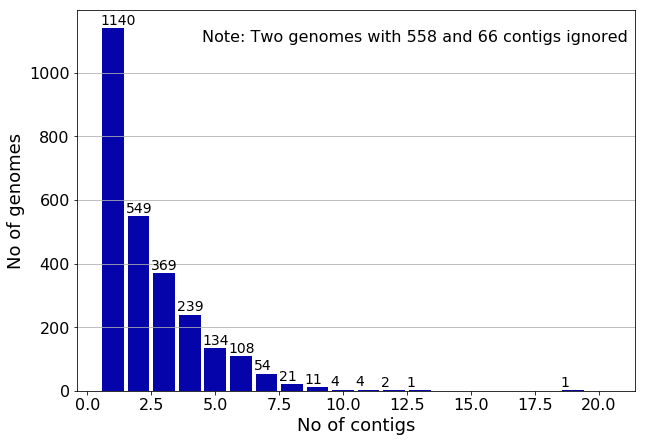

Number of genomes in the filtered dataset: 2637


In [12]:
def remove_high_contig_genomes(df_genome_data, contig_cutoff=20):
    '''
    Removes genomes with more than 20 contigs
    '''
    
    df_genome_data = df_genome_data[df_genome_data.Contigs < contig_cutoff]
    
    return df_genome_data


def plot_contig_dist(df_genome_data, fig_path):
    '''
    Plots distribution of contigs per genome 
    '''
    
    d = df_genome_data.Contigs.tolist()

    plt.figure(figsize=(10,7))
    arr = plt.hist(x=d, bins=20, range = (0.5,20.5), color='#0504aa',
                                alpha=1, rwidth=0.85)
    plt.grid(axis='y', alpha=1)
    plt.xlabel('No of contigs',fontsize=18)
    plt.ylabel('No of genomes', fontsize=18)
    plt.text(4.5, 1100, 'Note: Two genomes with 558 and 66 contigs ignored',  fontsize=16) 
    # The numbers 558 and 66 were manually checked for removed genomes

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    for i in range(20):
        if arr[0][i] != 0:
            plt.text(arr[1][i],arr[0][i]+12,str(int(arr[0][i])), fontsize= 14)
            
    plt.savefig(fig_path, pad_inches = 0.1, bbox_inches = 'tight')
    plt.show()
    
    return None

df_genome_data = remove_high_contig_genomes(df_genome_data, 20)
fig_path = '../figures/raw/contig_dist_curation.png'
plot_contig_dist(df_genome_data, fig_path)

print('Number of genomes in the filtered dataset:', df_genome_data.shape[0])

### 2. Genomes with atypical (high/low) genome size

Next, genomes with atypical genome size were removed as compared to organisms of the same genus

We plot GC content vs genome size scatter plot to get an overview of the average distribution per genera and then manually remove the outliers based on the scatter plot.

{'Citrobacter': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'Dickeya': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), 'Enterobacter': (1.0, 0.4980392156862745, 0.054901960784313725), 'Escherichia': (1.0, 0.7333333333333333, 0.47058823529411764), 'Klebsiella': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 'Other': (0.596078431372549, 0.8745098039215686, 0.5411764705882353), 'Pantoea': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 'Pectobacterium': (1.0, 0.596078431372549, 0.5882352941176471), 'Photorhabdus': (0.5803921568627451, 0.403921568627451, 0.7411764705882353), 'Proteus': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589), 'Raoultella': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), 'Salmonella': (0.7686274509803922, 0.611764705882353, 0.5803921568627451), 'Serratia': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), 'Shigella': (0.9686274509803922, 0.7137254901960784, 0.82

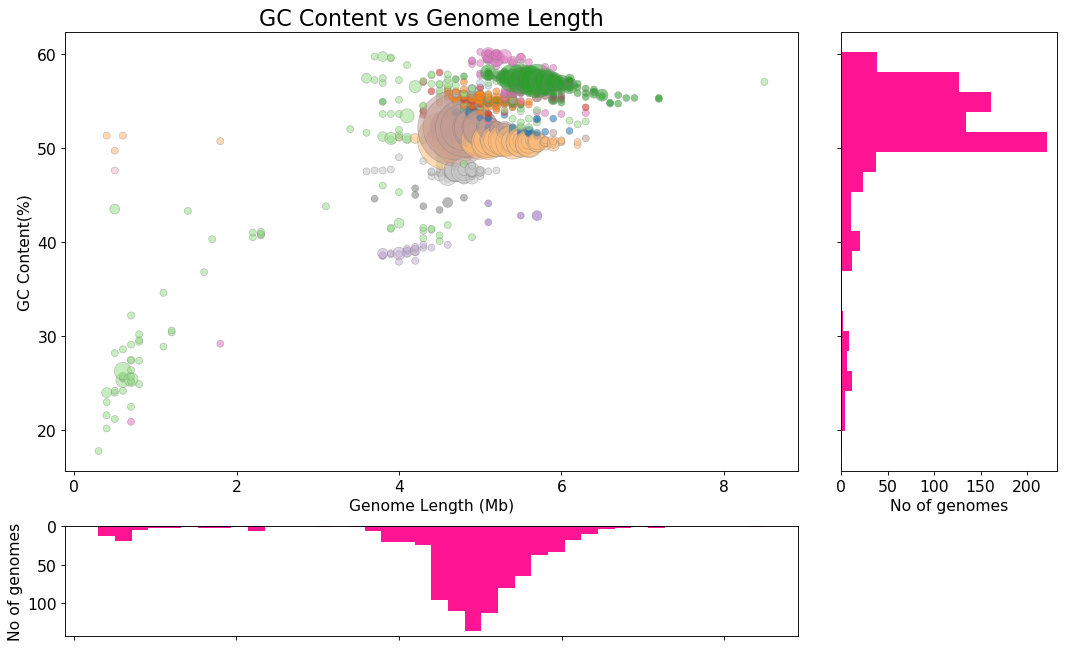

Genome removed due to short length of 463270 : PATRIC accn -  1086030.5
Genome removed due to short length of 650317 : PATRIC accn -  138074.5
Genome removed due to large length of 8461711 : PATRIC accn -  28141.658
Genome removed due to short length of 1822639 : PATRIC accn -  562.7382
Genome removed due to short length of 567150 : PATRIC accn -  562.7622
Genome removed due to short length of 391326 : PATRIC accn -  562.7692
Genome removed due to short length of 455856 : PATRIC accn -  562.7736
Genome removed due to short length of 1762765 : PATRIC accn -  568817.3
Number of genomes in the filtered dataset: 2629


In [13]:
def update_genus_cat(df_genome_data, genus_color_palette):
    '''
    Updates dataframe with genera with top 15 genus categories
    '''
    
    for df_idx in df_genome_data.index:
        genome_name = df_genome_data.loc[df_idx, 'Genome Name']
        genus_name = genome_name.split(' ')[0]

        df_genome_data.loc[df_idx, 'Genus'] = genus_name
        if genus_name in genus_color_palette.keys():
            df_genome_data.loc[df_idx, 'Genus_cat'] = genus_name
        else:
            df_genome_data.loc[df_idx, 'Genus_cat'] = 'Other'
    
    return df_genome_data
    

def get_scatter_data_gc_len(df_genome_data):
    '''
    Returns dataframe for scatter plot of genome length vs gc content as per the genus
    '''
    
    scat_data = df_genome_data[['Genome Length', 'GC Content']].astype(float)
    
    scat_data['Genome Length'] =  round(scat_data['Genome Length']/1000000,1)
    # Genome length in MBs
    
    scat_data['GC Content'] = round(scat_data['GC Content'],1)
    # GC content rounded off to first decimal
    
    scat_data['genus_cat'] = df_genome_data.Genus_cat
    
    scat_data_cnts = scat_data.groupby(['Genome Length', 'GC Content','genus_cat']).size().reset_index(name='counts')
    
    return scat_data_cnts


def plot_scatter(scat_data_cnts, genus_color_palette, fig_path):
    '''
    Plots sctter distribution of genome length vs gc content as per the genus to evaluate outliers
    '''
    
    cnt_colors = scat_data_cnts.genus_cat.map(genus_color_palette)
    
    # Create Fig and gridspec
    fig = plt.figure(figsize=(16, 10), dpi= 80)
    grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
    
    # Define the axes
    ax_main = fig.add_subplot(grid[:-1, :-1])
    ax_right = fig.add_subplot(grid[:-1, -1], yticklabels=[])
    ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[])
    
    # Scatterplot on main ax
    ax_main.scatter('Genome Length', 'GC Content', data=scat_data_cnts, s=scat_data_cnts.counts*40, 
                    c=cnt_colors, alpha = 0.55, edgecolors='gray', linewidths=.5)

    # histogram on the right
    ax_bottom.hist(scat_data_cnts['Genome Length'], 40, histtype='stepfilled', orientation='vertical', color='deeppink')
    ax_bottom.invert_yaxis()

    # histogram in the bottom
    ax_right.hist(scat_data_cnts['GC Content'], 20, histtype='stepfilled', orientation='horizontal', 
                  color='deeppink')

    # Decorations
    ax_main.set(title='GC Content vs Genome Length', 
                xlabel='Genome Length (Mb)', ylabel='GC Content(%)')
    ax_main.title.set_fontsize(20)

    ax_bottom.set(ylabel='No of genomes')
    ax_right.set(xlabel='No of genomes')

    for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
        item.set_fontsize(14)

    for item in ([ax_right.xaxis.label, ax_right.yaxis.label] + ax_right.get_xticklabels() + ax_right.get_yticklabels()):
        item.set_fontsize(14)

    for item in ([ax_bottom.xaxis.label, ax_bottom.yaxis.label] + ax_bottom.get_xticklabels() + ax_bottom.get_yticklabels()):
        item.set_fontsize(14)
    plt.savefig(fig_path, pad_inches = 0.1, bbox_inches = 'tight')
    plt.show()
    
    return None

    
def remove_genomes_of_atypical_len(df_genome_data):
    '''
    Removes genomes with shorter or longer lengths compared with average as per genera
    Bounds are manually selected based on the scatter plot visualized earlier
    Genomes from other genera are not removed
    '''
    
    filtered_idx = []
    for df_idx in df_genome_data.index:
        if df_genome_data.loc[df_idx, 'Genus_cat'] not in ['Other']:
            if df_genome_data.loc[df_idx, 'Genome Length'] < int(2000000):
                print('Genome removed due to short length of', df_genome_data.loc[df_idx, 'Genome Length'], 
                      ': PATRIC accn - ', df_idx)
            else:
                filtered_idx.append(df_idx)
        else:
            if df_genome_data.loc[df_idx, 'Genome Length'] > int(8000000):
                print('Genome removed due to large length of', df_genome_data.loc[df_idx, 'Genome Length'],
                     ': PATRIC accn - ', df_idx)
            else:
                filtered_idx.append(df_idx)        

    df_genome_data = df_genome_data.loc[filtered_idx, :]
        
    return df_genome_data

   
def get_genus_colors():
    '''
    Dictionary with genus level color codes are saved in pickles dir
    This genus color code is manually generated for most important genera of Enterobacteria
    '''
    
    genus_colors_path = '../pickles/genus_colors.p' 
    pickle_in = open(genus_colors_path,"rb")
    genus_color_palette = pickle.load(pickle_in)
    pickle_in.close()
    print(genus_color_palette)
    
    return genus_color_palette
    
    
genus_color_palette = get_genus_colors()
df_genome_data = update_genus_cat(df_genome_data, genus_color_palette)
scat_data_cnts = get_scatter_data_gc_len(df_genome_data)
fig_path = '../figures/raw/scat_plot_curation.png'
plot_scatter(scat_data_cnts, genus_color_palette, fig_path)
df_genome_data = remove_genomes_of_atypical_len(df_genome_data)

print('Number of genomes in the filtered dataset:', df_genome_data.shape[0])

### 3. N50 genome quality

Further, we removed few genomes based on N50 values 

In [14]:
def get_N50_data(df_genome_data, data_dir = '../data/patric_entero/genomes/', 
                 filtered_genomes = '../data/patric_entero/filtered/'):
    '''
    Calculates N50 score for all genomes 
    '''
    
    for pat in df_genome_data.index:
        fasta_path = os.path.join(data_dir, pat, pat + '.fna')
        seqlength=[]
        if not os.path.isfile(fasta_path):
            fasta_path = os.path.join(filtered_genomes, pat, pat + '.fna')
            # If already removed from input data set to filtered genomes

        for record in SeqIO.parse(fasta_path, 'fasta'): 
            bp=len(record.seq)
            seqlength.append(bp)

        total_len=sum(seqlength)
        seqlength=sorted(seqlength, reverse=True)

        df_genome_data.loc[pat, 'max_seq_len'] = seqlength[0]

        #creat a list of unique lengths 
        unique=[]
        for i in seqlength: 
            if not i in unique: 
                unique.append(i)

        sumlen=0
        for j in unique: 
            numbase=seqlength.count(j)*j
            sumlen=sumlen+numbase
            if sumlen>total_len/2: 
                df_genome_data.loc[pat, 'N50_score'] = j
                break
        
    for pat in df_genome_data.index:
        df_genome_data.loc[pat, 'N50_by_total'] = df_genome_data.loc[pat, 'N50_score'] / df_genome_data.loc[pat, 'Genome Length']
        df_genome_data.loc[pat, 'max_by_total'] = df_genome_data.loc[pat, 'max_seq_len'] / df_genome_data.loc[pat, 'Genome Length']
        
    return df_genome_data

    
def remove_low_N50(df_genome_data, cutoff=0.5):
    '''
    Removes genomes with low N50 by total ration
    '''
    
    filtered_idx = []
    for df_idx in df_genome_data.index:
        if df_genome_data.loc[df_idx, 'N50_by_total'] < cutoff:
            print('Genome removed due to low N50 by total genome length: ', df_genome_data.loc[df_idx, 'N50_by_total'], 
                      ': PATRIC accn - ', df_idx)
        else:
            filtered_idx.append(df_idx)        

    df_genome_data = df_genome_data.loc[filtered_idx, :]
    
    return df_genome_data
    
df_genome_data = get_N50_data(df_genome_data)
df_genome_data = remove_low_N50(df_genome_data, 0.5)

print('Number of genomes in the filtered dataset:', df_genome_data.shape[0])

Genome removed due to low N50 by total genome length:  0.46486793574988794 : PATRIC accn -  138072.44
Genome removed due to low N50 by total genome length:  0.15030102708721516 : PATRIC accn -  548.405


### Data with multiple genomes for single organism

Get information on organisms that have more than one genome to understand redundancy  

In [16]:
def get_redundant_genomes(df_genome_data):
    '''
    Returns a separate dataframe with strains having multiple genome dataset
    '''
    
    genome_name_dict = dict()
    genome_len_dict = dict()
    multidata_genomes_list = list()

    for df_idx in df_genome_data.index:
        genome_name = df_genome_data.loc[df_idx, 'Genome Name']
        pat_id = df_idx
        genome_len = df_genome_data.loc[df_idx, 'Genome Length']

        if genome_name not in genome_name_dict.keys():
            genome_name_dict[genome_name] = [pat_id]
            genome_len_dict[genome_name] = [genome_len]
        else:
            genome_name_dict[genome_name].append(pat_id)
            genome_len_dict[genome_name].append(genome_len)

            if genome_name not in multidata_genomes_list:
                multidata_genomes_list.append(genome_name)

    print(len(multidata_genomes_list), 'Genomes with more than one datasets... \n')
    for genome_name in multidata_genomes_list:
        print(genome_name, '\n PATRIC IDs:', genome_name_dict[genome_name], 
              '\n Genome lengths', genome_len_dict[genome_name], '\n')

    # Pick up one dataset? 
    df_multi_data = pd.DataFrame(index=multidata_genomes_list, columns=['Selected Patric', 'Selcted Assembly Accession', 
                                                                        'All Patric IDs'])
    for org in multidata_genomes_list:
        df_multi_data.loc[org, 'All Patric IDs'] = genome_name_dict[org]
    
    return df_multi_data


df_multi_data = get_redundant_genomes(df_genome_data)

37 Genomes with more than one datasets... 

Yersinia pestis A1122 
 PATRIC IDs: ['1035377.4', '1035377.9'] 
 Genome lengths [4658411, 4674565] 

synthetic Escherichia coli C321.deltaA 
 PATRIC IDs: ['1385755.5', '1385755.6'] 
 Genome lengths [4650162, 4650152] 

Klebsiella quasipneumoniae strain ATCC 700603 
 PATRIC IDs: ['1463165.4', '1463165.70'] 
 Genome lengths [5586672, 5513032] 

Salmonella enterica subsp. enterica serovar Enteritidis 
 PATRIC IDs: ['149539.317', '149539.318', '149539.319', '149539.320', '149539.321', '149539.324', '149539.325', '149539.326', '149539.327'] 
 Genome lengths [4710936, 4667283, 4671261, 4709890, 4702741, 4678377, 4678571, 4678914, 4677619] 

Escherichia coli O157:H7 str. EDL933 
 PATRIC IDs: ['155864.210', '155864.42', '155864.8'] 
 Genome lengths [4709911, 5639399, 5620522] 

Shigella flexneri 4c 
 PATRIC IDs: ['1617964.7', '1617964.8'] 
 Genome lengths [4980844, 4767656] 

Yersinia pestis CO92 
 PATRIC IDs: ['214092.181', '214092.21'] 
 Genome len

### Save table with final list of genomes considered for the analysis

We downloaded this final list of 2627 Enterobacterial genomes next. 

These downloaded genomes are stored in input directory : **../data/patric_entero/genomes/**

In [36]:
### Save final dataset for further analysis as df_entero
df_genome_data.to_csv('../tables/patric_entero/df_entero.csv')
df_genome_data.to_pickle('../pickles/df_entero.p')
df_multi_data.to_csv('../tables/patric_entero/select_multiple_genomes.csv')